In [54]:
#All the libraries and dependencies

import pandas as pd
import numpy as np
import os
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline

In [72]:
# Due to the large size, let's take the first 100,000 data
users = []
with open('user.json') as f:
    for i, line in enumerate(f):
        users.append(json.loads(line))
        if i+1 >= 100000:
            break
df = pd.DataFrame(users)
df.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,2013-10-08 23:11:33,84,17,25,"2015,2016,2017","c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",5,...,0,0,0,0,1,1,1,1,2,0
1,4XChL029mKr5hydo79Ljxg,Jenna,33,2013-02-21 22:29:06,48,22,16,,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",4,...,0,0,0,0,0,0,1,1,0,0
2,bc8C_eETBWL0olvFSJJd0w,David,16,2013-10-04 00:16:10,28,8,10,,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",0,...,0,0,0,0,1,0,0,0,0,0
3,dD0gZpBctWGdWo9WlGuhlA,Angela,17,2014-05-22 15:57:30,30,4,14,,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",5,...,0,0,0,0,0,2,0,0,1,0
4,MM4RJAeH6yuaN8oZDSt0RA,Nancy,361,2013-10-23 07:02:50,1114,279,665,"2015,2016,2017,2018","mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",39,...,1,0,0,1,16,57,80,80,25,5


In [4]:
#Checking the statistics of the dataset

df.describe()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,82.558470,211.546330,104.439670,133.010090,7.146770,3.798690,13.757830,1.73952,1.254500,1.005030,0.477890,8.135450,18.552510,18.771650,18.771650,7.094370,7.262320
std,201.292528,1353.683818,941.570493,1149.299821,38.507842,0.733975,216.503309,21.10247,27.541587,16.835325,10.529963,78.640364,215.653474,214.506727,214.506727,80.523743,188.018509
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,6.000000,1.000000,1.000000,0.000000,3.450000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,23.000000,5.000000,6.000000,1.000000,3.860000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,71.000000,85.000000,23.000000,27.000000,3.000000,4.250000,1.000000,0.00000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000
max,12390.000000,89792.000000,86122.000000,83915.000000,2964.000000,5.000000,34167.000000,3575.00000,5660.000000,2254.000000,2261.000000,7579.000000,14888.000000,19348.000000,19348.000000,8341.000000,39055.000000


In [69]:
#Checking for null values

df.isnull().sum()

review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
friend_count          0
yelp_since_YRMO       0
yelp_since_year       0
tagged_compliment     0
raters                0
dtype: int64

In [7]:
# Dropping columns that we don't need

df = df.drop(["user_id", "name"], axis=1)
df.head()

,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,95,2013-10-08 23:11:33,84,17,25,"2015,2016,2017","c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",5,4.03,2,0,0,0,0,1,1,1,1,2,0
1,33,2013-02-21 22:29:06,48,22,16,,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",4,3.63,1,0,0,0,0,0,0,1,1,0,0
2,16,2013-10-04 00:16:10,28,8,10,,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",0,3.71,0,0,0,0,0,1,0,0,0,0,0
3,17,2014-05-22 15:57:30,30,4,14,,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",5,4.85,1,0,0,0,0,0,2,0,0,1,0
4,361,2013-10-23 07:02:50,1114,279,665,"2015,2016,2017,2018","mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",39,4.08,28,1,0,0,1,16,57,80,80,25,5


In [8]:
# Make column friend_count = number of friends

friend_count = [0 for _ in range(df.shape[0])]
for i in range(df.shape[0]):
    friend_count[i] = len(df.loc[i, "friends"].split(","))
    
friend_count = pd.DataFrame(friend_count)
print(friend_count)

          0
0        99
1      1152
2        15
3       525
4       231
...     ...
99995     1
99996     4
99997     1
99998     1
99999     1

[100000 rows x 1 columns]


In [9]:
# Add column friend count column to main dataframe
df['friend_count'] = friend_count

# Drop column friends as not used again
df = df.drop(["friends"], axis=1)
df.head()

,review_count,yelping_since,useful,funny,cool,elite,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,friend_count
0,95,2013-10-08 23:11:33,84,17,25,"2015,2016,2017",5,4.03,2,0,0,0,0,1,1,1,1,2,0,99
1,33,2013-02-21 22:29:06,48,22,16,,4,3.63,1,0,0,0,0,0,0,1,1,0,0,1152
2,16,2013-10-04 00:16:10,28,8,10,,0,3.71,0,0,0,0,0,1,0,0,0,0,0,15
3,17,2014-05-22 15:57:30,30,4,14,,5,4.85,1,0,0,0,0,0,2,0,0,1,0,525
4,361,2013-10-23 07:02:50,1114,279,665,"2015,2016,2017,2018",39,4.08,28,1,0,0,1,16,57,80,80,25,5,231


In [11]:
#From yelping_since make columns for year and yearmonth (YRMO)

df['yelping_since'] = pd.to_datetime(df['yelping_since'])

df['yelp_since_YRMO'] = df['yelping_since'].map(lambda x: 100*x.year + x.month)
df['yelp_since_year'] = df['yelping_since'].dt.year

df.head()

,review_count,yelping_since,useful,funny,cool,elite,fans,average_stars,compliment_hot,compliment_more,...,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,friend_count,yelp_since_YRMO,yelp_since_year
0,95,2013-10-08 23:11:33,84,17,25,"2015,2016,2017",5,4.03,2,0,...,0,1,1,1,1,2,0,99,201310,2013
1,33,2013-02-21 22:29:06,48,22,16,,4,3.63,1,0,...,0,0,0,1,1,0,0,1152,201302,2013
2,16,2013-10-04 00:16:10,28,8,10,,0,3.71,0,0,...,0,1,0,0,0,0,0,15,201310,2013
3,17,2014-05-22 15:57:30,30,4,14,,5,4.85,1,0,...,0,0,2,0,0,1,0,525,201405,2014
4,361,2013-10-23 07:02:50,1114,279,665,"2015,2016,2017,2018",39,4.08,28,1,...,1,16,57,80,80,25,5,231,201310,2013


In [12]:
# Column to store whether compliment has been tagged

tagged_compliment = [0 for _ in range(df.shape[0])]
for i in range(df.shape[0]):
    if sum(df.iloc[i, 7:18].values) > 0:
        tagged_compliment[i] = 1
        
tagged_compliment = pd.DataFrame(tagged_compliment)
df['tagged_compliment'] = tagged_compliment

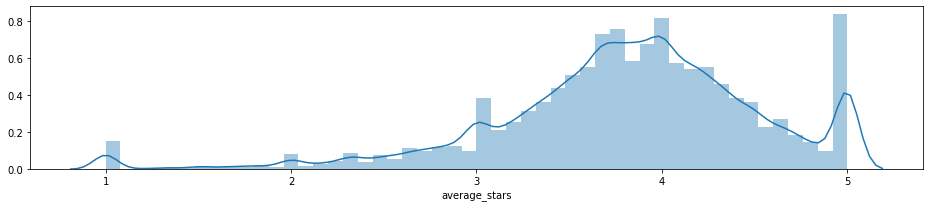

In [13]:
#Plotting average stars

plt.figure(figsize=(16,3))
sns.distplot(df.average_stars)

In [14]:
#Rating

raters_below_3 = len(df.loc[df.average_stars <= 3])
print("Users who rate <= 3 Avg Stars: {:0.02%}".format(raters_below_3/df.shape[0]))

Users who rate <= 3 Avg Stars: 12.53%


In [15]:
#Low & Highest raters

low_raters = len(df.loc[df.average_stars < 4])
high_raters = len(df.loc[df.average_stars >= 4])
print("Low Raters, <4 Avg Stars: {:0.02%}".format(low_raters/df.shape[0]))
print("High Raters >=4 Avg Stars: {:0.02%}".format(high_raters/df.shape[0]))

Low Raters, <4 Avg Stars: 58.18%
High Raters >=4 Avg Stars: 41.82%


In [18]:
# Making a column raters, which is 1 for high raters (>=4 avg stars), and 0 for the rest (<4)

raters = [0 for _ in range(df.shape[0])]
for i in range(df.shape[0]):
    if df.loc[i,"average_stars"] >= 4:
        raters[i] = 1
df['raters'] = raters
df

,review_count,yelping_since,useful,funny,cool,elite,fans,average_stars,compliment_hot,compliment_more,...,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,friend_count,yelp_since_YRMO,yelp_since_year,tagged_compliment,raters
0,95,2013-10-08 23:11:33,84,17,25,"2015,2016,2017",5,4.03,2,0,...,1,1,1,2,0,99,201310,2013,1,1
1,33,2013-02-21 22:29:06,48,22,16,,4,3.63,1,0,...,0,1,1,0,0,1152,201302,2013,1,0
2,16,2013-10-04 00:16:10,28,8,10,,0,3.71,0,0,...,0,0,0,0,0,15,201310,2013,1,0
3,17,2014-05-22 15:57:30,30,4,14,,5,4.85,1,0,...,2,0,0,1,0,525,201405,2014,1,1
4,361,2013-10-23 07:02:50,1114,279,665,"2015,2016,2017,2018",39,4.08,28,1,...,57,80,80,25,5,231,201310,2013,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37,2013-11-17 02:23:34,39,22,21,,1,3.88,0,2,...,0,0,0,0,0,1,201311,2013,1,0
99996,22,2013-07-19 19:16:57,13,10,2,,0,4.04,0,0,...,0,0,0,0,0,4,201307,2013,1,1
99997,8,2011-09-07 22:11:22,1,3,0,,0,1.75,0,0,...,0,0,0,0,0,1,201109,2011,1,0
99998,30,2010-06-11 14:46:59,20,2,5,2016,1,4.67,0,0,...,1,1,1,1,0,1,201006,2010,1,1


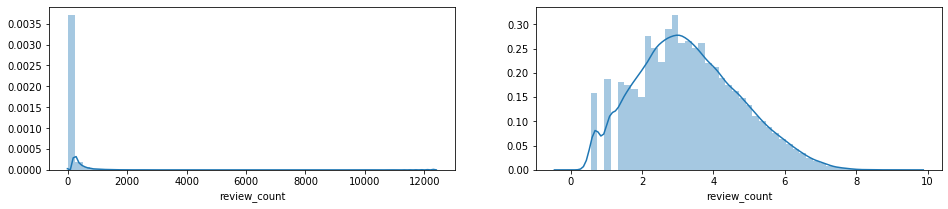

In [21]:
plt.figure(figsize=(16,3))
plt.subplot(121)
sns.distplot(df.review_count)

# Taking a Normal Distribution to check the data if they are skewed or not.
plt.subplot(122)
sns.distplot(df.review_count.apply(np.log1p))

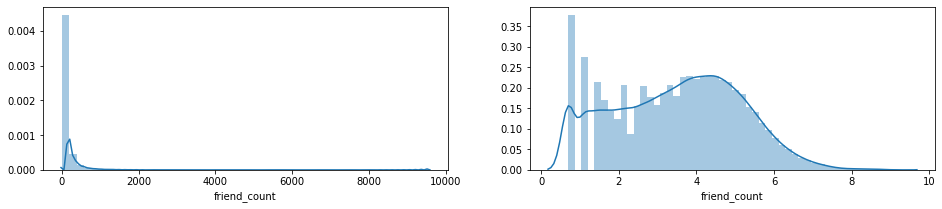

In [23]:
#Friendc count of reviewers

plt.figure(figsize=(16,3))
plt.subplot(121)
sns.distplot(df.friend_count)

# Taking a Normal Distribution to see if it's heavily skewed or not.
plt.subplot(122)
sns.distplot(df.friend_count.apply(np.log1p))

In [24]:
#Useful reviews
useful_reviews = len(df.loc[df.useful > 0])
print("People who leave useful reviews: {:0.0%}".format(useful_reviews/df.shape[0]))

People who leave useful reviews: 94%


In [26]:
#Scaling values for better comaprison

from sklearn.preprocessing import StandardScaler

features = ['review_count', 'useful', 'funny', 'cool', 'fans',
       'average_stars', 'compliment_hot', 'compliment_more',
       'compliment_profile', 'compliment_cute', 'compliment_list',
       'compliment_note', 'compliment_plain', 'compliment_cool',
       'compliment_funny', 'compliment_writer', 'compliment_photos',
       'friend_count', 'raters', 'tagged_compliment']
x = df.loc[:, features]
x = StandardScaler().fit_transform(x)

In [27]:
# Adding column names back to data, and converting ndarray back to datafram object

df_train = pd.DataFrame(x, columns=features)
df_train.head()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,friend_count,raters,tagged_compliment
0,0.061809,-0.094222,-0.092866,-0.093980,-0.055749,0.315149,-0.054308,-0.082432,-0.04555,-0.059698,-0.045384,-0.090736,-0.081393,-0.082849,-0.082849,-0.063266,-0.038626,-0.044453,1.179564,0.0
1,-0.246202,-0.120816,-0.087556,-0.101810,-0.081718,-0.229831,-0.058927,-0.082432,-0.04555,-0.059698,-0.045384,-0.103452,-0.086030,-0.082849,-0.082849,-0.088103,-0.038626,3.640265,-0.847771,0.0
2,-0.330657,-0.135591,-0.102425,-0.107031,-0.185594,-0.120835,-0.063546,-0.082432,-0.04555,-0.059698,-0.045384,-0.090736,-0.086030,-0.087511,-0.087511,-0.088103,-0.038626,-0.338391,-0.847771,0.0
3,-0.325689,-0.134113,-0.106673,-0.103551,-0.055749,1.432358,-0.058927,-0.082432,-0.04555,-0.059698,-0.045384,-0.103452,-0.076756,-0.087511,-0.087511,-0.075685,-0.038626,1.446230,1.179564,0.0
4,1.383275,0.666668,0.185394,0.462884,0.827192,0.383272,0.065783,-0.035044,-0.04555,-0.059698,0.049584,0.100007,0.178285,0.285439,0.285439,0.222366,-0.012032,0.417449,1.179564,0.0


In [28]:
#Checking the statistical charecteristics

df_train.describe()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,friend_count,raters,tagged_compliment
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.0
mean,3.296818e-15,-2.666357e-14,-3.880811e-14,-1.587219e-14,-1.718116e-14,7.069915e-15,-4.223611e-14,-5.944337e-14,-5.945904e-14,3.614579e-14,5.621302e-14,-9.450550e-14,1.307495e-14,2.886948e-14,2.886948e-14,5.306928e-14,8.340620e-15,2.893076e-15,-1.178049e-15,0.0
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,0.0
min,-4.101438e-01,-1.562753e-01,-1.109213e-01,-1.157320e-01,-1.855935e-01,-3.813076e+00,-6.354591e-02,-8.243247e-02,-4.554953e-02,-5.969799e-02,-4.538405e-02,-1.034518e-01,-8.602970e-02,-8.751121e-02,-8.751121e-02,-8.810328e-02,-3.862575e-02,-3.873805e-01,-8.477707e-01,0.0
25%,-3.654325e-01,-1.518430e-01,-1.098592e-01,-1.148619e-01,-1.855935e-01,-4.750721e-01,-6.354591e-02,-8.243247e-02,-4.554953e-02,-5.969799e-02,-4.538405e-02,-1.034518e-01,-8.602970e-02,-8.751121e-02,-8.751121e-02,-8.810328e-02,-3.862575e-02,-3.628857e-01,-8.477707e-01,0.0
50%,-2.909137e-01,-1.392846e-01,-1.056110e-01,-1.105114e-01,-1.596246e-01,8.353251e-02,-6.354591e-02,-8.243247e-02,-4.554953e-02,-5.969799e-02,-4.538405e-02,-1.034518e-01,-8.602970e-02,-8.751121e-02,-8.751121e-02,-8.810328e-02,-3.862575e-02,-2.614073e-01,-8.477707e-01,0.0
75%,-5.742154e-02,-9.348340e-02,-8.649387e-02,-9.223931e-02,-1.076869e-01,6.148882e-01,-5.892702e-02,-8.243247e-02,-4.554953e-02,-5.969799e-02,-4.538405e-02,-7.801948e-02,-7.675551e-02,-7.818745e-02,-7.818745e-02,-7.568452e-02,-3.862575e-02,4.536297e-03,1.179564e+00,0.0
max,6.114237e+01,6.617565e+01,9.135587e+01,7.289865e+01,7.678613e+01,1.636726e+00,1.577501e+02,1.693299e+02,2.054629e+02,1.338261e+02,2.146763e+02,9.627247e+01,6.895100e+01,9.011058e+01,9.011058e+01,1.034968e+02,2.076813e+02,3.307602e+01,1.179564e+00,0.0


In [30]:
#PCA for reducing dimensionality

df_train.columns

Index(['review_count', 'useful', 'funny', 'cool', 'fans', 'average_stars',
       'compliment_hot', 'compliment_more', 'compliment_profile',
       'compliment_cute', 'compliment_list', 'compliment_note',
       'compliment_plain', 'compliment_cool', 'compliment_funny',
       'compliment_writer', 'compliment_photos', 'friend_count', 'raters',
       'tagged_compliment'],
      dtype='object')

In [55]:
df_compliments = df_train.loc[:, ['compliment_hot', 'compliment_more', 'compliment_profile',
       'compliment_cute', 'compliment_list', 'compliment_note',
       'compliment_plain', 'compliment_cool', 'compliment_funny',
       'compliment_writer', 'compliment_photos']]
pca = PCA(n_components=1)
compli_feedback = pca.fit_transform(df_compliments)
compli_feedback = pd.DataFrame(data=compli_feedback)

In [35]:
print('PCA Components:', pca.components_)
print('Ratio of Variance Explained:', pca.explained_variance_ratio_ )

PCA Components: [[0.30170173 0.31739695 0.28938012 0.27919782 0.25615893 0.3201341
  0.2911947  0.32568386 0.32568386 0.32288822 0.27793634]]
Ratio of Variance Explained: [0.76155795]


In [70]:
x = pd.concat([compli_feedback, df.loc[:,'average_stars']], axis=1)
x

,0,average_stars
0,-0.221900,4.03
1,-0.236735,3.63
2,-0.237094,3.71
3,-0.233061,4.85
4,0.329889,4.08
...,...,...
99995,-0.211083,3.88
99996,-0.241165,4.04
99997,-0.241165,1.75
99998,-0.232768,4.67


In [67]:
#Finding out the number of clusters using the Elbow method

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

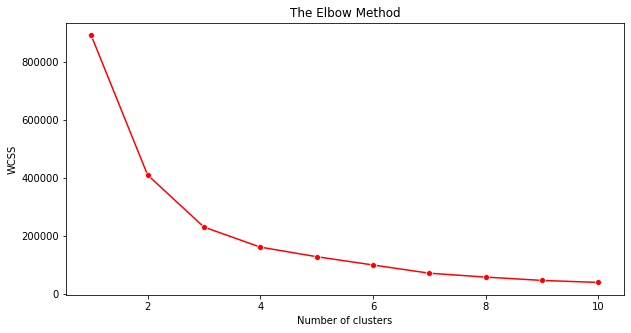

In [68]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

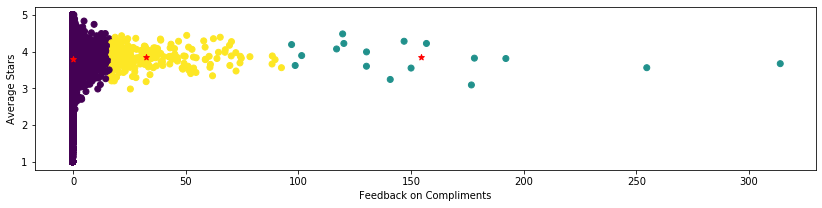

In [58]:
#Fitting the KMeans algorithm, and also plotting the clusters on graphs.

ml = KMeans(n_clusters=3)
ml.fit(x)
all_predictions = ml.predict(x)
centroids = ml.cluster_centers_

plt.figure(figsize=(14, 3))
plt.scatter(x.iloc[:,0].values, x.iloc[:,1].values, c=all_predictions)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='#ff0000')
plt.xlabel('Feedback on Compliments')
plt.ylabel('Average Stars')
plt.show()

<h2>3 clusters: low_complimented, moderately_complimented, highly_complimented users.</h2>

<h4>1. Low_complimented users </h4>with low count of compliments_feedback, or the leftmost centroid/cluster depict that users who get low/occasional compliments, rate across the spectrum of average ratings, but mostly staying at the center (3.5-4 avg).

<h4>2. Moderately_complimented users, </h4>who have a higher numder of compliments, rate in a stricter margin of 3-4.5 star avg rating, with majority at 4, which means users with moderate compliments, rate more highly on average.

<h4>3. Highly_complimented users,</h4> are low in numbers, as opposed to others, and if we assume their sample sparsity is representative of the population, then we can say they also on average rate highly or above 4 stars in most cases, but show wider variance as opposed to moderately complimented users.